<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [64]:
from js import fetch
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [65]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


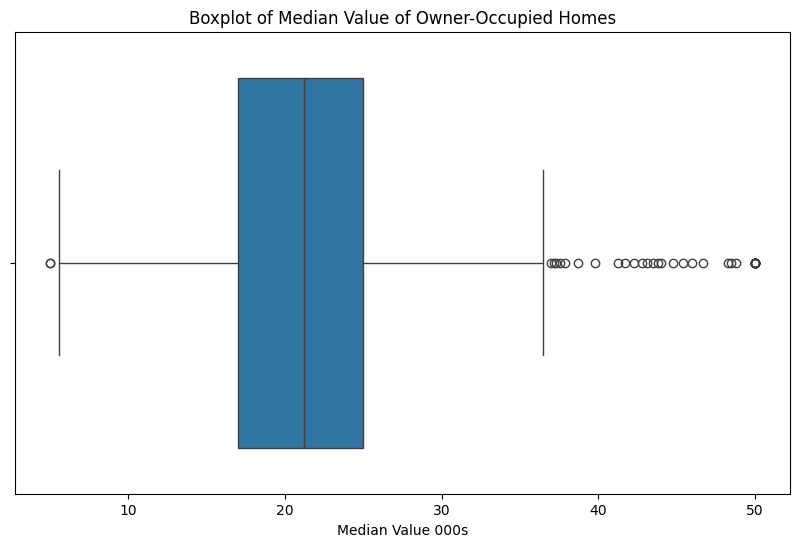

In [66]:
# TASK 1 Become familiar with the dataset
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

# TASK 2
# 1 Create a boxplot for the "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value 000s')
plt.show()

# Findings: Median ~22k, significant outliers with very expensive housing, right skew as most homes are on the left ie cheaper

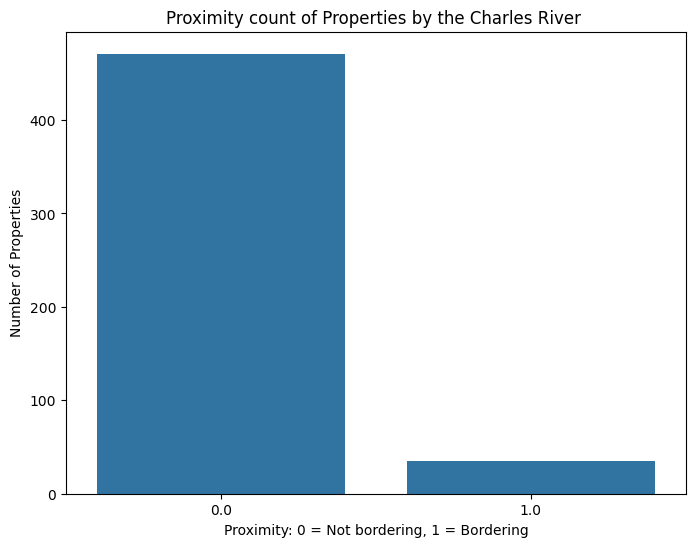

In [67]:
# TASK 2
# 2 Provide a bar plot for the Charles river variable
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Proximity count of Properties by the Charles River ')
plt.xlabel('Proximity: 0 = Not bordering, 1 = Bordering')
plt.ylabel('Number of Properties')
plt.show()

# Findings: Vast majority do not border the river, could ones bordering be also the higher value properties ? Or could be more risk advers locations ? 

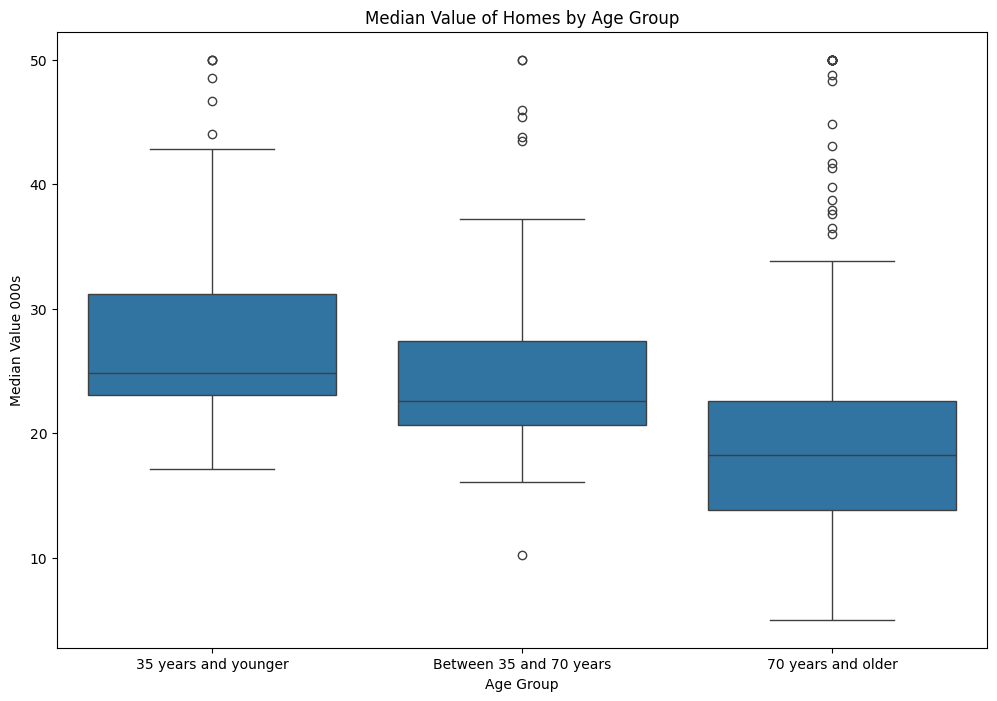

In [68]:
# TASK 2
# 3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# split the Age variable into 35 years and younger, between 35 and 70 years and 70 years and older
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Create a boxplot for MEDV vs. the discretized AGE variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value 000s')
plt.show()

# Findings: outliers in each category where homes greater exceed typical market value. Younger group has a higher median. 
# Oldest group has large range  far greater particulary on the lower range than all otehr categories

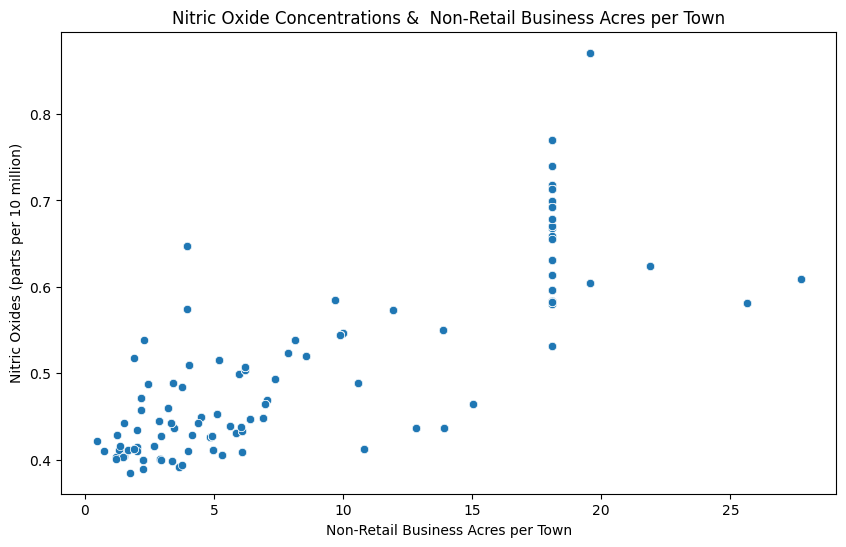

In [69]:
# TASK 2
# 4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship? see below
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentrations &  Non-Retail Business Acres per Town')
plt.xlabel('Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxides (parts per 10 million)')
plt.show()

#Findings:  land  for non-retail businessshows increased concentration of nitric oxides in the air.

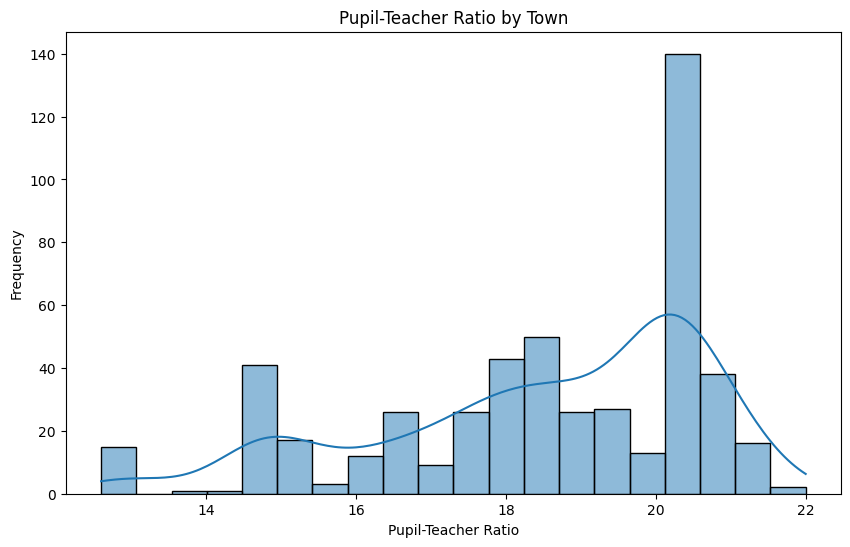

In [70]:
# TASK 2
# 5 Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

#Findings: peak around pupil-teacher ratio of 20.5, also significant differences in educational environment.

In [71]:
#Task 3: Use the appropriate tests to answer the questions provided.
# Use α = 0.05 /  Perform  test Statistics /  State  conclusions
# Set the significance level
alpha = 0.05


In [72]:
#1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#######################################################################################################################################################################
# Prep data
river_grouped = boston_df.groupby('CHAS')['MEDV']
t_stat, p_value = stats.ttest_ind(river_grouped.get_group(1), river_grouped.get_group(0), equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 3.113291312794837
P-value: 0.003567170098137517


In [73]:
#1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#######################################################################################################################################################################
    # HYPOTHESIS: Null: There is no difference in the median value of houses bounded by the Charles River compared to those that are not
    # ANSWER:  p-value 0.003567170098137517 < 𝛼=0.05 hence null hypothesis is rejected. 
    #         There is a  significant difference in the median values of houses based on whether they are bounded by the Charles River or not


In [74]:
#2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#######################################################################################################################################################################
# ANOVA model with AGE as continuous variable
anova_model = ols('MEDV ~ AGE', data=boston_df).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)
print(anova_result)


                sum_sq     df          F        PR(>F)
AGE        6069.761065    1.0  83.477459  1.569982e-18
Residual  36646.534350  504.0        NaN           NaN


In [75]:
#2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#######################################################################################################################################################################
    # HYPOTHESIS: Null:There is no difference in the median values of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE).
    # ANSWER:  p-value 1.569982e-18< 𝛼=0.05 hence null hypothesis is rejected. 
    #         There is a significant difference in the median values of houses based on the age (conditions as stated)


In [76]:
#3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#######################################################################################################################################################################
# Pearson correlation coefficient and p-value
correlation_coeff, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
correlation_coeff, p_value_corr


(0.7636514469209192, 7.913361061210442e-98)

In [77]:
#3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#######################################################################################################################################################################
    # HYPOTHESIS: Null: There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)
    # ANSWER: p-value 7.913361061210442e-98 < 𝛼=0.05 hence null hypothesis is rejected. 
    #         A very strong positive relationship is seen between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [78]:
#4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
##################################################################################################################################################################
# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
regression_summary = model.summary()

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        17:12:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#######################################################################################################################################################################
    # HYPOTHESIS: Null: The coefficient of the weighted distance to five Boston employment centres (DIS) is zero (no impact).
    # ANSWER: Prob (F-statistic):	1.21e-08  < 𝛼=0.05 hence null hypothesis is rejected. 
    #         The weighted distance to the five Boston employment centres (DIS) has a statistically significant impact on the median value of owner-occupied homes (MEDV).
